In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [167]:
def monte_carlo_simulation(pity_s, guarantee, amount):
    char_result = []
    roll_to_limited_s = []
    rng_result = []
    # base probability
    prob_s = 0.006
    prob_a = 0.072
    prob_b = 0.922
    prob_guarantee_s = 0.5
    
    # hitung probabilitas kumulatif
    cum_prob_s = prob_s
    cum_prob_a = cum_prob_s + prob_a
    cum_prob_b = cum_prob_a + prob_b
    
    # track the amount of character
    count_standard_s = 0
    count_limited_s = 0
    count_a = 0
    count_b = 0
    
    # pity system
    pity_s = pity_s
    pity_a = 0
    # pity counter
    count_pity_s = 0
    count_pity_a = 0
    
    # check guarantee
    is_guarantee = guarantee
    
    # looping
    for i in range(amount):
        # random number
        roll = random.random()
        
        if pity_s >= 89:
            pity_s = 0
            pity_a = 0
            count_pity_s += 1
            if is_guarantee:
                count_limited_s += 1
                char_result.append('LS')
                roll_to_limited_s.append(i+1)
                is_guarantee = False
            else:
                if random.random() < prob_guarantee_s:
                    count_limited_s += 1
                    char_result.append('LS')
                    roll_to_limited_s.append(i+1)
                else:
                    count_standard_s += 1
                    char_result.append('S')
                    is_guarantee = True
        else:
            if roll < cum_prob_s:
                pity_s = 0
                pity_a = 0
                if is_guarantee:
                    count_limited_s += 1
                    char_result.append('LS')
                    is_guarantee = False
                    roll_to_limited_s.append(i+1)
                else:
                    if random.random() < prob_guarantee_s:
                        count_limited_s += 1
                        char_result.append('LS')
                        roll_to_limited_s.append(i+1)
                    else:
                        count_standard_s += 1
                        char_result.append('S')
                        is_guarantee = True
            elif roll < cum_prob_a:
                count_a += 1
                pity_s += 1
                pity_a = 0
                char_result.append('A')
            else:
                if pity_a >= 9:
                    count_a += 1
                    pity_s += 1
                    pity_a = 0
                    count_pity_a += 1
                    char_result.append('A')
                else:
                    count_b += 1
                    pity_s += 1
                    pity_a += 1
                    char_result.append('B')
        rng_result.append(roll)
    
    # summary
    print('Base Probabilty Karakter')
    print(f'probability S: {prob_s}\nprobability A: {prob_a}\nprobability B: {prob_b}')
    print(f'\nProbabilitas Kumulatif')
    print(f'Probabilitas S: {cum_prob_s}\nProbabilitas A: {cum_prob_a}\nProbabilitas B: {cum_prob_b}')
    
        
    
    return rng_result, char_result, roll_to_limited_s, count_limited_s, count_standard_s, count_a, count_b

## Input state awal dan total simulasi

In [236]:
pity_awal = 10
guarantee = True
total_sim = 1000000

roll_cost = 160

#jika pity awal 90 maka reset jadi 0 jika melebihi 90 maka sisa dibagi 90
pity_awal = pity_awal if pity_awal < 90 else pity_awal%90
print(f'pity awal : {pity_awal}')

pity awal : 10


## Jalankan Simulasi

In [237]:
rng_result, char_result, roll_to_limited_s, count_limited_s, count_standart_s, count_a, count_b = monte_carlo_simulation(pity_awal, guarantee, total_sim)

Base Probabilty Karakter
probability S: 0.006
probability A: 0.072
probability B: 0.922

Probabilitas Kumulatif
Probabilitas S: 0.006
Probabilitas A: 0.078
Probabilitas B: 1.0


## Hasil Simulasi

In [238]:
#jumlah total karakter S 
count_s = count_limited_s + count_standart_s
#probabilitas karakter
prob_limited_s = count_limited_s/total_sim
prob_s = count_s/total_sim
prob_a = count_a/total_sim
prob_b = count_b/total_sim

print(f'Hasil simulasi setelah {total_sim} kali pull')

print(f'\nJumlah karakter\n---------------------')
print(f'Limited S: {count_limited_s}')
print(f'S: {count_s}')
print(f'A: {count_a}')
print(f'B: {count_b}')

print(f'\nProbabilitas karakter \n---------------------')
print(f'Limited S: {prob_limited_s*100:.2f}%')
print(f'S: {prob_s*100:.2f}%')
print(f'A: {prob_a*100:.2f}%')
print(f'B: {prob_b*100:.2f}%')

Hasil simulasi setelah 1000000 kali pull

Jumlah karakter
---------------------
Limited S: 9548
S: 14331
A: 130371
B: 855298

Probabilitas karakter 
---------------------
Limited S: 0.95%
S: 1.43%
A: 13.04%
B: 85.53%


### Karakter Limited S

In [239]:
print(roll_to_limited_s)
interval_limited_s = [roll_to_limited_s[0]] + [roll_to_limited_s[i] - roll_to_limited_s[i-1] for i in range(1, len(roll_to_limited_s))]
print(f'\nRolls at which limited character S was obtained: \n{interval_limited_s}')

print(f'\n\nSummary\n---------------------')
average_limited_s = np.mean(interval_limited_s)
print(f'Average rolls to get limited character S: {average_limited_s:.1f} Pulls')
print(f'Average cost to get limited character S: {average_limited_s*roll_cost:.1f} Polychromes')

#pull needed to get the character from pity awal
print(f'---------------------')
print(f'Pull needed to get the character based on pity awal : {average_limited_s - pity_awal:.0f} Pulls')
print(f'Cost needed to get limited character S: {(average_limited_s - pity_awal)*roll_cost:.0f} Polychromes')

#pity counter
amount_pity_s = interval_limited_s.count(90)
print(f'\nPity\n---------------------')
print(f'Amount of pity S: {amount_pity_s}')
print(f'Probability of getting unlucky: {(amount_pity_s/total_sim)*100:.3f}%')

[80, 162, 252, 342, 518, 698, 755, 845, 967, 998, 1107, 1140, 1309, 1359, 1418, 1508, 1547, 1727, 1817, 1907, 2087, 2105, 2190, 2350, 2507, 2647, 2725, 2895, 2933, 3073, 3253, 3263, 3359, 3470, 3502, 3682, 3772, 3862, 3933, 4023, 4126, 4216, 4306, 4486, 4576, 4592, 4682, 4834, 4872, 4927, 5017, 5107, 5197, 5339, 5429, 5519, 5617, 5797, 5878, 6000, 6058, 6190, 6348, 6473, 6579, 6696, 6786, 6956, 7046, 7066, 7230, 7320, 7410, 7590, 7608, 7788, 7804, 7984, 7992, 8172, 8325, 8352, 8401, 8581, 8671, 8681, 8742, 8922, 9012, 9138, 9158, 9181, 9271, 9280, 9370, 9472, 9495, 9548, 9655, 9733, 9829, 9919, 9944, 10124, 10182, 10231, 10317, 10407, 10529, 10616, 10765, 10857, 10947, 11024, 11192, 11372, 11434, 11524, 11593, 11683, 11824, 11939, 12029, 12209, 12299, 12479, 12659, 12753, 12843, 12931, 13045, 13135, 13225, 13240, 13330, 13486, 13576, 13666, 13846, 13936, 14026, 14133, 14252, 14332, 14512, 14692, 14786, 14876, 14966, 15056, 15155, 15305, 15485, 15562, 15688, 15813, 15827, 15917, 16041, 

### Karakter S in General

In [240]:
# average pull needed (ditambah 1 karena index mulai dari 0)
rolls_to_get_s = [index + 1 for index, char in enumerate(char_result) if char == 'S' or char == 'LS']
print(f'Rolls at which character S was obtained: {rolls_to_get_s}')

interval_rolls_to_s = [rolls_to_get_s[0]] + [rolls_to_get_s[i] - rolls_to_get_s[i-1] for i in range(1, len(rolls_to_get_s))]

print(f'Rolls to get character S: {interval_rolls_to_s}')

print(f'\n\nSummary\n---------------------')
average_s = np.mean(interval_rolls_to_s)
print(f'Average rolls to get character S: {average_s:.1f} Pulls')
print(f'Average cost to get character S: {average_s*roll_cost:.1f} Polychromes')

#pull needed to get the character from pity awal
print(f'---------------------')
print(f'Pull needed to get the character based on pity awal : {average_s - pity_awal:.0f} Pulls')
print(f'Cost needed to get limited character S: {(average_s - pity_awal)*roll_cost:.0f} Polychromes')


amount_pity_s = interval_rolls_to_s.count(90)
print(f'\nPity\n---------------------')
print(f'Amount of pity S: {amount_pity_s}')
print(f'Probability of getting unlucky: {(amount_pity_s/total_sim)*100:.3f}%')

Rolls at which character S was obtained: [80, 131, 162, 252, 342, 432, 518, 608, 698, 755, 845, 935, 967, 998, 1088, 1107, 1140, 1219, 1309, 1359, 1405, 1418, 1508, 1547, 1637, 1727, 1817, 1907, 1997, 2087, 2105, 2190, 2260, 2350, 2417, 2507, 2597, 2647, 2725, 2805, 2895, 2933, 2983, 3073, 3163, 3253, 3263, 3269, 3359, 3449, 3470, 3502, 3592, 3682, 3772, 3862, 3933, 4023, 4113, 4126, 4216, 4306, 4396, 4486, 4576, 4592, 4682, 4772, 4834, 4872, 4927, 5017, 5107, 5197, 5270, 5339, 5429, 5519, 5609, 5617, 5707, 5797, 5878, 5968, 6000, 6058, 6148, 6190, 6280, 6348, 6438, 6473, 6563, 6579, 6669, 6696, 6786, 6876, 6956, 7046, 7058, 7066, 7156, 7230, 7320, 7410, 7500, 7590, 7608, 7698, 7788, 7804, 7894, 7984, 7992, 8082, 8172, 8253, 8325, 8352, 8401, 8491, 8581, 8671, 8681, 8705, 8742, 8832, 8922, 9012, 9048, 9138, 9158, 9181, 9271, 9280, 9370, 9382, 9472, 9495, 9548, 9598, 9655, 9706, 9733, 9739, 9829, 9919, 9926, 9944, 10034, 10124, 10182, 10225, 10231, 10317, 10407, 10439, 10529, 10616, 107

## Tabel

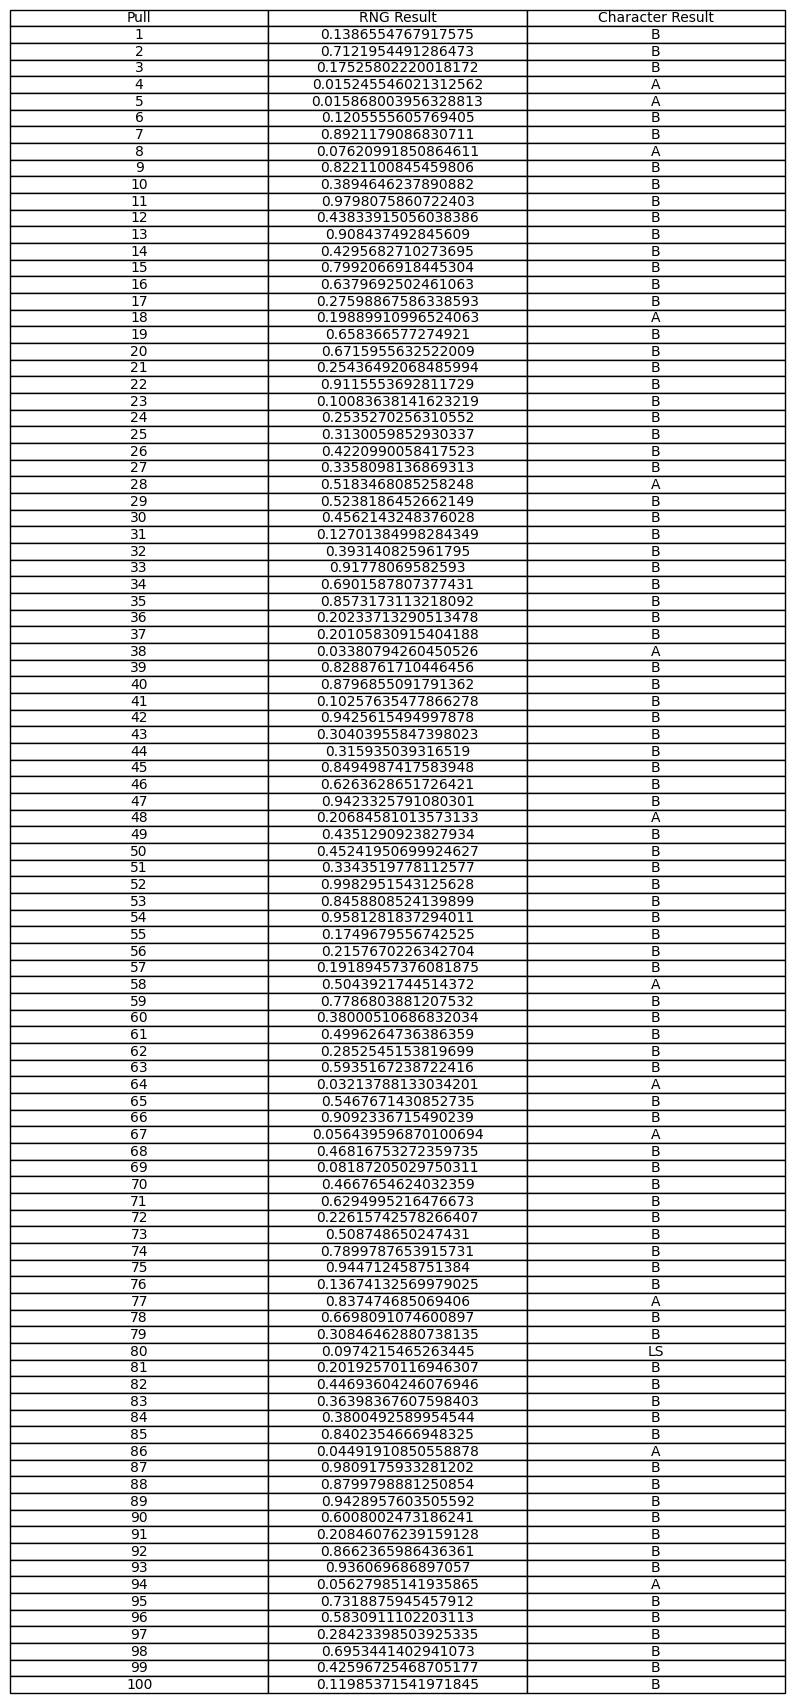

In [269]:
data = {
    'Pull': range(1, total_sim + 1),
    'RNG Result': rng_result,
    'Character Result': char_result
}

df = pd.DataFrame(data)

# Plot the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=df.head(100).values, colLabels=df.columns, cellLoc='center', loc='center')

plt.show()

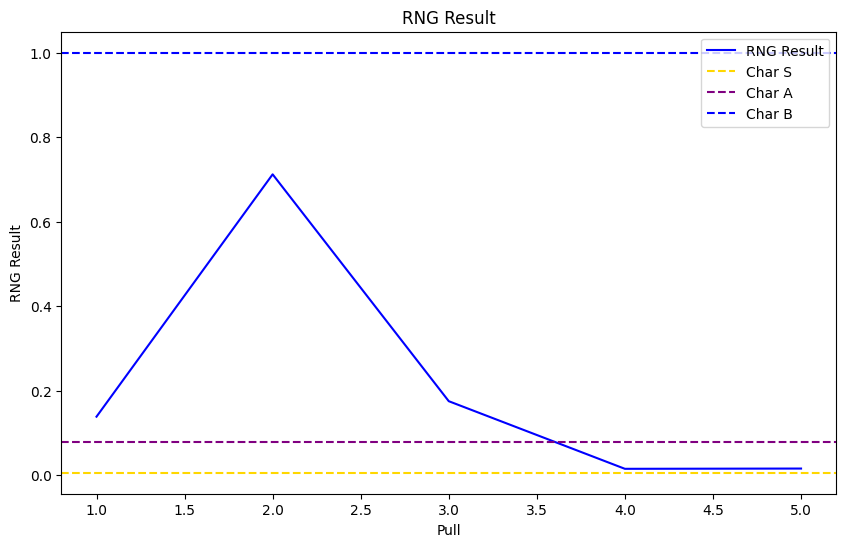

In [256]:
plt.figure(figsize=(10, 6))
plt.plot(df['Pull'].head(5), df['RNG Result'].head(5), color='blue', label='RNG Result')
plt.axhline(y=0.006, color='gold', linestyle='--', label='Char S')
plt.axhline(y=0.078, color='purple', linestyle='--', label='Char A')
plt.axhline(y=1, color='blue', linestyle='--', label='Char B')
plt.xlabel('Pull')
plt.ylabel('RNG Result')
plt.title('RNG Result')
plt.legend(loc='upper right')
plt.show()